In [1]:
import csv
import random
import star_functions as nana
import glob
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
import numpy as np
from astropy import units as u
import matplotlib.ticker as ticker
import importlib
import os
importlib.reload(nana)
%reload_ext autoreload
%autoreload 2
from datetime import datetime
from lightkurve import LightCurve
import time

/Users/nana/venv/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [2]:
with open('KICids.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #this skips the header
    kicz = list(reader)

for row in kicz:
    row[0] = int(str(int(row[0]))) 

In [3]:
interesting_kics = np.array([5952403, 6548447, 7899980, 11044372, 6934963, 11140501, 10934758, 9941242])

In [10]:
rando_kics = random.sample(kicz, 5)

In [5]:
rando_kics

[[6923466], [3458776], [6431380], [6356889], [6362469]]

nana.get_kepler_data() took 0.31403279304504395 seconds


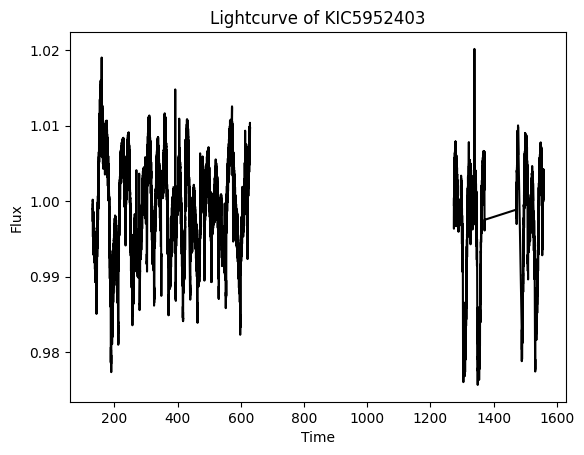

Running median of mini periodogram: [1.37283576e-07 1.37283576e-07 1.54604976e-07 ... 3.29286978e-09
 3.29286978e-09 3.29286978e-09]


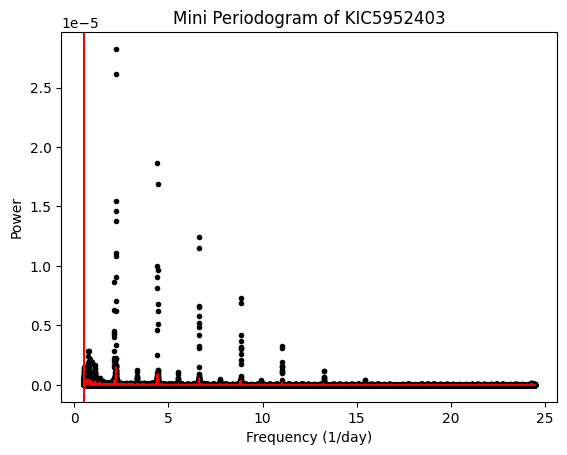

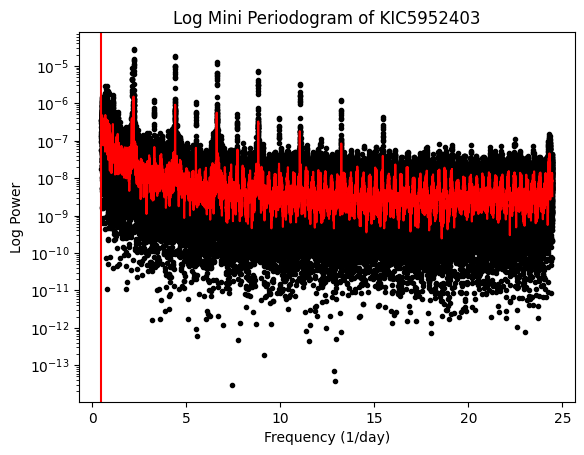

region_and_freq() took 13.822938203811646 seconds


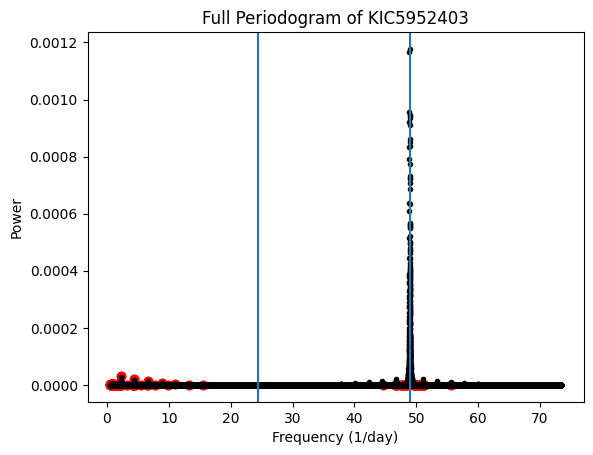

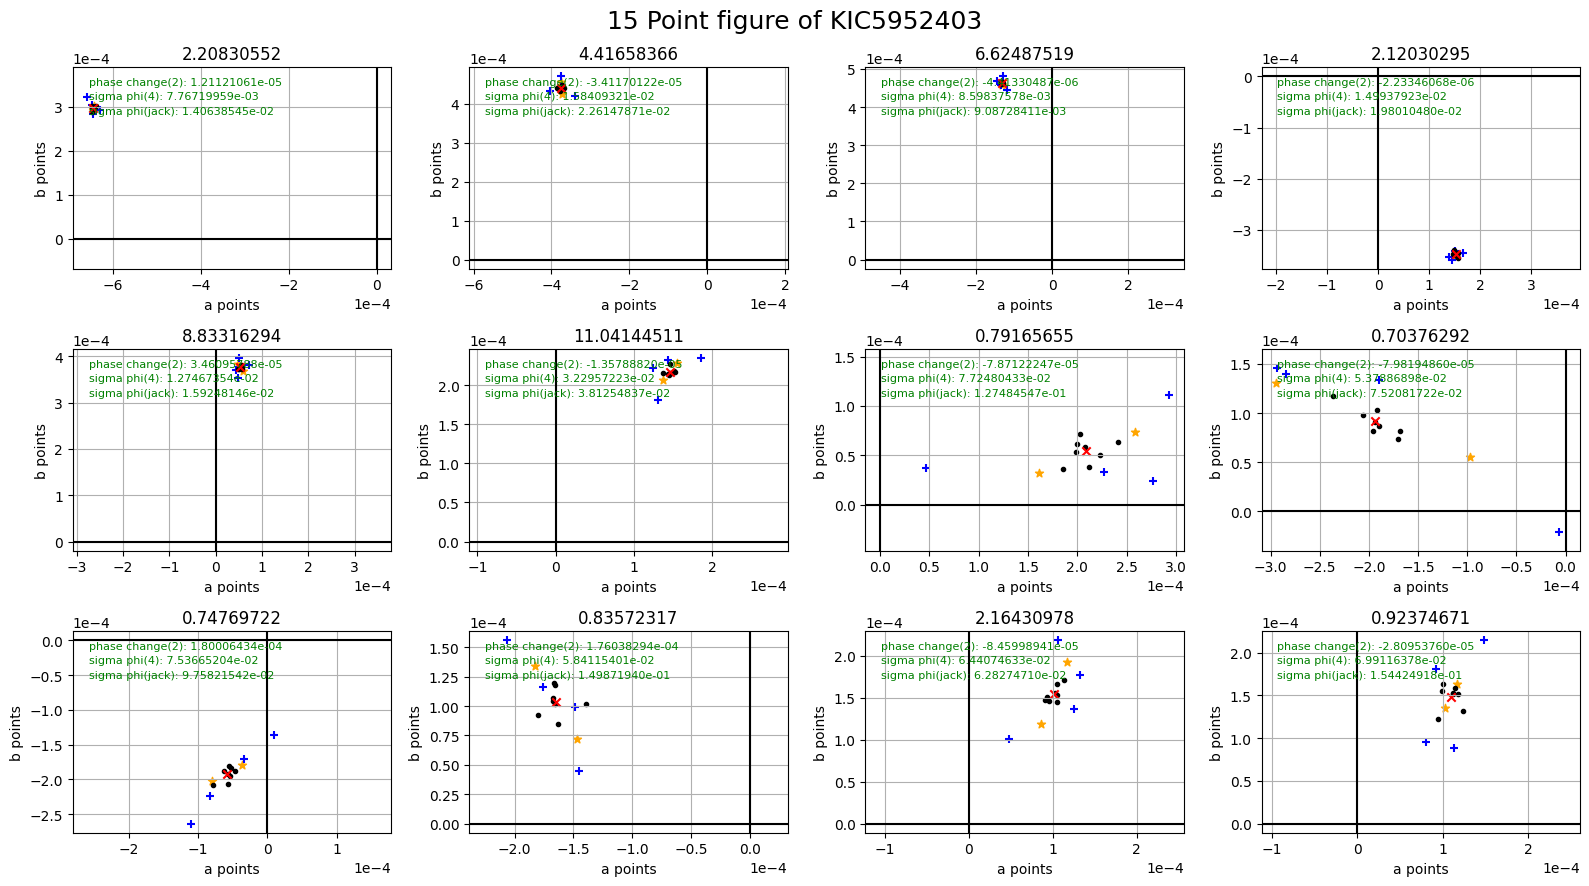

find_modes_in_star() finished processing star KIC5952403
Found modes length: 100
Final frequencies: [ 2.20830552  4.41658366  6.62487519  2.12030295  8.83316294 11.04144511
  0.79165655  0.70376292  0.74769722  0.83572317  2.16430978  0.92374671
  1.10422057  0.52600104  0.51522196  0.65974686  3.31242737 13.24974483
  0.53654194  0.61681542  0.87967711  5.52072473 48.38845981  0.63520941
 49.50788787 49.66287275  0.60147203  0.80916765 47.97140641  1.36251655
  0.58555034  1.23231561  7.72898427  0.68441588  0.76109391 48.26847098
  2.25307576  1.29764042 15.45804832  2.07638866 47.82265261  9.93730459
  0.64652505 49.84514601  2.17656617 49.7157719  48.43682933 49.67112272
 46.75356513  1.33103182 49.96653978 49.75903698 47.79553211  1.49552832
  0.99034285 51.23496336 50.00413884  1.03682306 46.7150503   0.86210698
  2.19739778  0.95055914  1.01163052 51.08217178  1.15604686  1.31916358
  1.40755501  1.27565213  4.4605476   4.50447885 46.59886318 49.83203207
  4.37267186 47.50463705

In [12]:
nana.find_modes_in_star(5952403, True, True)

nana.get_kepler_data() took 0.5964972972869873 seconds


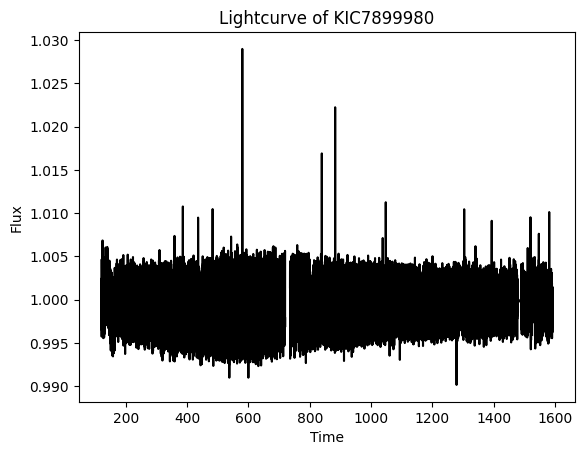

Running median of mini periodogram: [3.20225590e-09 3.20225590e-09 3.20225590e-09 ... 3.97395895e-10
 3.97395895e-10 3.97395895e-10]


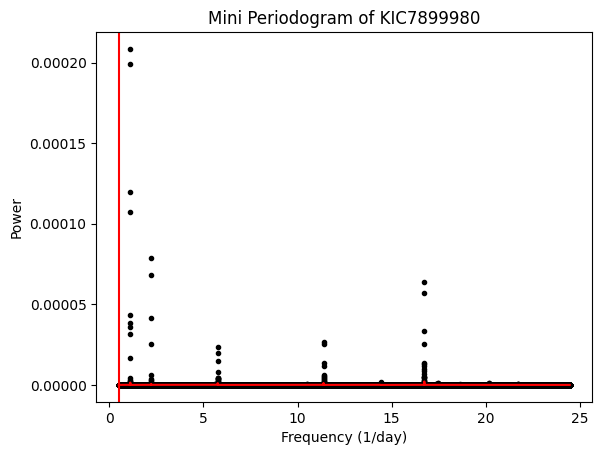

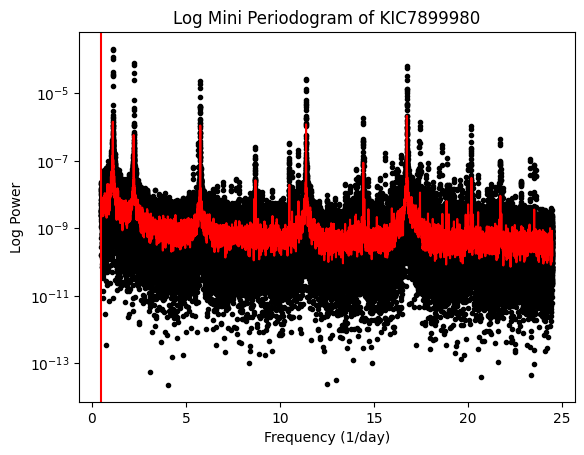

In [ ]:
nana.find_modes_in_star(7899980, True, False)

In [8]:
from scipy.ndimage import median_filter
print(median_filter)

<function median_filter at 0x12afa9800>
